# Create RandomForestModel for the data

In [7]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
client_nr_list = [665045, 293156, 198591]

client_data = pd.read_csv(f'client_data/{client_nr_list[1]}/events.csv', sep='|')
client_data

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,USER_SALES_GROUP,USER_SEGMENT,USER_SALES_DISTRICT,USER_PROMOTIONS_ALLOWED,EVENT,DATE,TIME,purchases_7_day_after,purchases_30_day_after,total_spend_on_product
0,2022-01-29T14:08:27.813Z,3.7488,950385,293156,"1,091,611,226",4667,NaN,Purchase List,Recommended Products,13.0,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW,2022-01-29,14:08:27.813,0,0,0.00
1,2022-01-29T14:08:27.867Z,2.3760,133368,293156,"1,031,161,481",4667,NaN,Purchase List,Recommended Products,9.0,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW,2022-01-29,14:08:27.867,0,0,0.00
2,2022-01-29T14:08:27.877Z,15.1140,495599,293156,"1,091,681,289",4667,NaN,Purchase List,Recommended Products,7.0,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW,2022-01-29,14:08:27.877,0,0,0.00
3,2022-01-29T14:08:27.861Z,3.6168,547498,293156,"1,091,611,309",4667,NaN,Purchase List,Recommended Products,8.0,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW,2022-01-29,14:08:27.861,0,0,0.00
4,2022-01-29T14:15:25.431Z,27.1788,215833,293156,"1,101,761,000",4667,40%25%20korting,Shopping Cart,Recommended Products,3.0,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW,2022-01-29,14:15:25.431,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2022-03-02T15:04:35.623Z,33.3960,76426,293156,"1,101,761,030",341677,NaN,NaN,NaN,NaN,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,ADD_TO_CARD,2022-03-02,15:04:35.623,1,3,153.33
507,2022-03-02T15:04:19.201Z,16.1700,628858,293156,"1,101,751,010",341677,NaN,NaN,NaN,NaN,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,ADD_TO_CARD,2022-03-02,15:04:19.201,2,5,258.06
508,2022-03-02T15:03:34.997Z,26.7300,148852,293156,"1,112,111,080",341677,NaN,NaN,NaN,NaN,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,ADD_TO_CARD,2022-03-02,15:03:34.997,1,1,0.00
509,2022-03-02T15:04:33.772Z,25.8192,822780,293156,"1,101,761,030",341677,NaN,NaN,NaN,NaN,...,Rest. dag/avondkaart,restauratief,Nieuwegein,1,ADD_TO_CARD,2022-03-02,15:04:33.772,1,3,205.06


In [61]:
df_proposition_article_categorie = client_data[['PROPOSITION', 'ARTICLE_CATEGORIE']]
df_proposition_article_categorie.head()

,PROPOSITION,ARTICLE_CATEGORIE
0,950385,"1,091,611,226"
1,133368,"1,031,161,481"
2,495599,"1,091,681,289"
3,547498,"1,091,611,309"
4,215833,"1,101,761,000"


In [60]:
client_purchase_data = pd.read_csv(f'client_data/{client_nr_list[1]}/purchases.csv', sep='|')
client_purchase_data

,USER_CLIENT_NUMBER,DATE,PROPOSITION,AMOUNT,NUMBER_OF_TIMES_SEEN_30_days,NUMBER_OF_TIMES_SEEN_7_days,NUMBER_OF_TIMES_SEEN_1_days,ARTICLE_CATEGORIE
0,293156,2022-03-03,53735,18.40,1,1,1,0
1,293156,2021-11-04,53735,26.49,0,0,0,0
2,293156,2021-10-07,53735,17.66,0,0,0,0
3,293156,2021-10-28,53735,8.83,0,0,0,0
4,293156,2022-03-31,53735,27.60,3,1,1,0
...,...,...,...,...,...,...,...,...
588,293156,2021-10-11,634284,18.98,0,0,0,0
589,293156,2022-01-31,634284,18.98,1,1,0,0
590,293156,2022-03-19,469857,26.80,1,1,1,0
591,293156,2021-10-23,95492,17.01,0,0,0,0


In [8]:
event_data = pd.read_csv('processed_data/processed_data_events_weather.csv', sep='|')
event_data

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,precipitation_amount_lead_1,temperature_lead_2,precipitation_coverage_lead_2,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4
0,2022-02-28T14:51:25.349Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.319,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000
1,2022-02-28T14:51:46.443Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.319,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000
2,2022-02-28T14:52:06.207Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.319,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000
3,2022-02-28T14:52:06.211Z,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,...,0.319,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000
4,2022-02-28T14:51:25.319Z,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,...,0.319,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937932,2022-01-28T15:48:08.723Z,35.7192,87264,804960,"1,081,451,429",319213,NaN,NaN,NaN,NaN,...,0.458,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343
9937933,2022-01-28T15:46:27.480Z,17.1204,594422,804960,"1,011,031,135",319213,NaN,NaN,NaN,NaN,...,0.458,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343
9937934,2022-01-28T15:48:43.837Z,18.2424,8749,804960,"1,011,011,555",319213,NaN,NaN,NaN,NaN,...,0.458,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343
9937935,2022-01-28T15:48:53.241Z,1.6500,255956,804960,"1,031,161,491",319213,NaN,NaN,NaN,NaN,...,0.458,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343


In [9]:
event_data_to_analyze = event_data.drop(["TIMESTAMP_EVENT", "PAGE_SECTION_POSITION"], axis=1)
event_data_to_analyze["date"] = pd.to_datetime(event_data_to_analyze["date"])
event_data_to_analyze["day_of_week"] = event_data_to_analyze["date"].dt.dayofweek
event_data_to_analyze

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PROMOTION_PRICE,PRODUCT_TYPE,...,temperature_lead_2,precipitation_coverage_lead_2,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,day_of_week
0,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,25.014,Meepakker,...,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000,0
1,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,25.014,Meepakker,...,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000,0
2,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,25.014,Meepakker,...,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000,0
3,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,11.220,Meepakker,...,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000,0
4,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,11.220,Meepakker,...,4.4,0.0,0.0,2.9,0.0,0.000,1.8,0.00,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937932,35.7192,87264,804960,"1,081,451,429",319213,NaN,NaN,NaN,NaN,NaN,...,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343,4
9937933,17.1204,594422,804960,"1,011,031,135",319213,NaN,NaN,NaN,NaN,NaN,...,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343,4
9937934,18.2424,8749,804960,"1,011,011,555",319213,NaN,NaN,NaN,NaN,NaN,...,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343,4
9937935,1.6500,255956,804960,"1,031,161,491",319213,NaN,NaN,NaN,NaN,NaN,...,3.4,0.0,0.0,1.3,75.0,8.973,3.8,33.33,3.343,4


# We will create a binary column for the reward, where 1 means that the reward was greater than 0 and 0 means that the reward was 0

In [12]:
# Vectorized operations to create binary columns
event_data_to_analyze['purchased_7_days_after_binary'] = (event_data_to_analyze['purchases_7_day_after'] > 0).astype(int)
event_data_to_analyze['purchased_30_days_after_binary'] = (event_data_to_analyze['purchases_30_day_after'] > 0).astype(int)


# encode the text based columns, of which we will save a dictionary for later use to decode the values

In [14]:
def data_events_to_categories_dict_creation(data_events):
    """
    Create a dictionary with the columns as keys and the values as a dictionary with the unique values as keys and the category number as values
    Args:
        data_events: 

    Returns:

    """
    transformation_dict = {}
    for col in ["PAGE_NAME", "PAGE_SECTION", "PRODUCT_TYPE", "DEVICE_INFO_BRAND", "DEVICE_INFO_TYPE", "DEVICE_INFO_BROWSER", "PROMOTION_LABEL", "USER_SALES_GROUP", "USER_SEGMENT", "USER_SALES_DISTRICT", "EVENT"]:
        unique_col_values = data_events[col].unique()
        
        category_number = 0
        transformation_dict[col] = {}
        for col_value in unique_col_values:
            transformation_dict[col][col_value] = category_number
            category_number +=1
    return transformation_dict



def get_inverse_transformation_dict(transformation_dict):
    """
    Create a dictionary with the columns as keys and the values as a dictionary with the category number as keys and the unique values as values
    Args:
        transformation_dict: 

    Returns:

    """
    #inverse of transformation dict
    inverse_transformation_dict = {}
    for col_name, dict_vals in transformation_dict.items():
        inverse_transformation_dict[col_name] = {}
        for dict_val, cat_num in dict_vals.items():
            inverse_transformation_dict[col_name][cat_num] = dict_val
            
    return inverse_transformation_dict



def transform_df_to_categories(events_table,  inverse_or_transformation_dict, to_categories=True):
    """
    Replace categorical values using map based on the inverse or transformation dict that is passed from the function
    Args:
        events_table: 
        inverse_or_transformation_dict: 
        to_categories: 

    Returns:

    """

    if to_categories:
        for column, mapping in inverse_or_transformation_dict.items():
            events_table[column] = events_table[column].map(lambda x: mapping[x])
    else:
        for column, mapping in inverse_or_transformation_dict.items():
            events_table[column] = events_table[column].map(lambda x: mapping[x])
    return events_table
        
# Replace categorical values using map
transformation_dict = data_events_to_categories_dict_creation(event_data_to_analyze)
inverse_transformation_dict = get_inverse_transformation_dict(transformation_dict)

    
transformed_event_df = transform_df_to_categories(event_data_to_analyze, transformation_dict, to_categories=True)
transformed_event_df.head()

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PROMOTION_PRICE,PRODUCT_TYPE,...,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,day_of_week,purchased_7_days_after_binary,purchased_30_days_after_binary
0,25.4760,554657,386730,"1,081,511,193",933,0,0,0,25.014,0,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0,0,0
1,25.4760,554657,386730,"1,081,511,193",933,0,0,0,25.014,0,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0,0,0
2,25.4760,554657,386730,"1,081,511,193",933,0,0,0,25.014,0,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0,0,0
3,12.5268,349240,386730,"1,091,661,078",933,0,0,0,11.220,0,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0,0,0
4,12.5268,349240,386730,"1,091,661,078",933,0,0,0,11.220,0,...,0.0,2.9,0.0,0.0,1.8,0.0,0.0,0,0,0


# Visualize the columns and their correlation with the reward

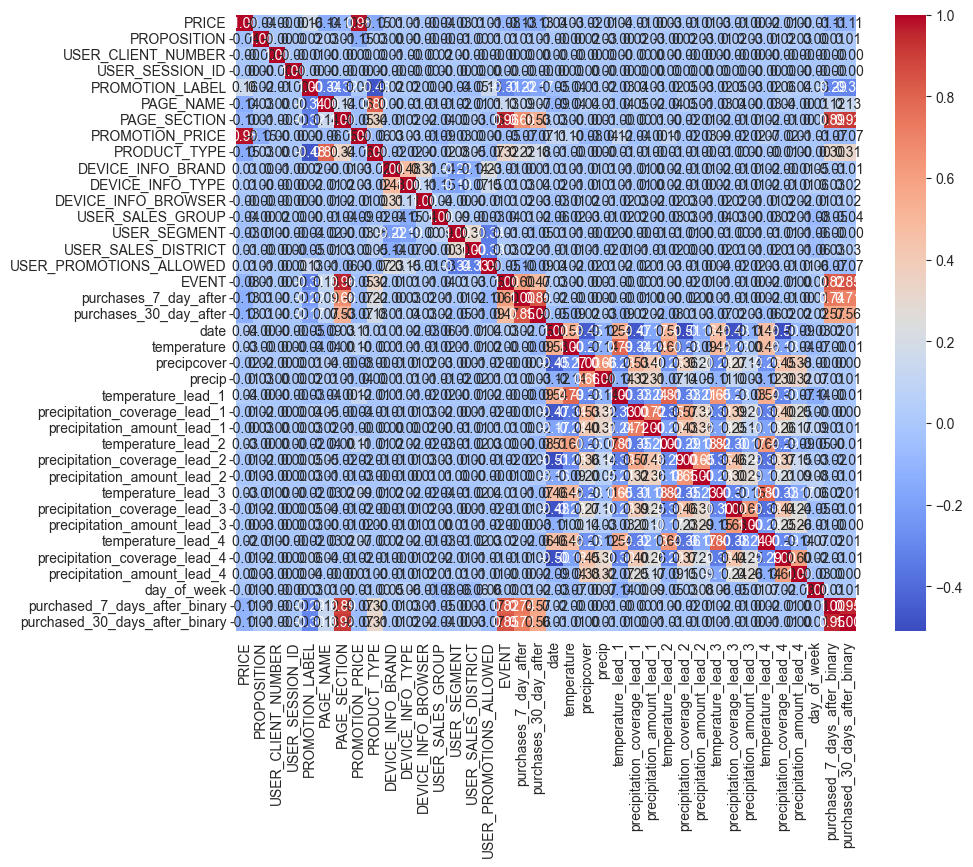

In [15]:
# Compute the correlation matrix
correlational_df = transformed_event_df.drop(columns=["ARTICLE_CATEGORIE", 'DATE', "TIME"])

corr = correlational_df.corr()
#rul_correlation = correlation_matrix['RUL']


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show plot
plt.show()

# We will now create a model that will predict the reward of a event
We will use a random forest model to do so

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


### Let us first take a even more tiny sample of the data to test the model

In [39]:
tiny_transformed_event_df = transformed_event_df.sample(frac=0.01, random_state=42)
#tiny_transformed_event_df = transformed_event_df

In [40]:
independent_variables = tiny_transformed_event_df.drop(
    columns=["purchases_7_day_after", "purchases_30_day_after", "purchased_7_days_after_binary",
             "purchased_30_days_after_binary", "DATE", "TIME", "EVENT", "ARTICLE_CATEGORIE", "date", "PAGE_SECTION", "PAGE_NAME", "PRODUCT_TYPE"])
dependent_variable = tiny_transformed_event_df["purchased_7_days_after_binary"]

X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2,
                                                    random_state=42)

# Create a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.14994914469712217
Mean Absolute Error: 0.31639464681022345
R2 Score: 0.3761603738719037


In [41]:
y_pred_rounded = np.round(y_pred)
y_pred_rounded

array([1., 1., 1., ..., 0., 1., 0.])

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

# Create classification report
class_report = classification_report(y_test, y_pred_rounded)

print(f"Confusion Matrix:\n{conf_matrix}")

print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[ 4666  3321]
 [  823 11066]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      7987
           1       0.77      0.93      0.84     11889

    accuracy                           0.79     19876
   macro avg       0.81      0.76      0.77     19876
weighted avg       0.80      0.79      0.78     19876



In [43]:
importances = rf_regressor.feature_importances_
feature_names = independent_variables.columns  # Replace this with your feature names if available

# Print the feature names and their importance scores
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


PRICE: 0.1481
PROPOSITION: 0.1274
USER_CLIENT_NUMBER: 0.0761
USER_SESSION_ID: 0.0757
PROMOTION_LABEL: 0.0080
PROMOTION_PRICE: 0.1774
DEVICE_INFO_BRAND: 0.0126
DEVICE_INFO_TYPE: 0.0057
DEVICE_INFO_BROWSER: 0.0411
USER_SALES_GROUP: 0.0313
USER_SEGMENT: 0.0124
USER_SALES_DISTRICT: 0.0373
USER_PROMOTIONS_ALLOWED: 0.0056
temperature: 0.0252
precipcover: 0.0100
precip: 0.0134
temperature_lead_1: 0.0228
precipitation_coverage_lead_1: 0.0088
precipitation_amount_lead_1: 0.0127
temperature_lead_2: 0.0223
precipitation_coverage_lead_2: 0.0087
precipitation_amount_lead_2: 0.0115
temperature_lead_3: 0.0227
precipitation_coverage_lead_3: 0.0090
precipitation_amount_lead_3: 0.0120
temperature_lead_4: 0.0250
precipitation_coverage_lead_4: 0.0105
precipitation_amount_lead_4: 0.0130
day_of_week: 0.0134


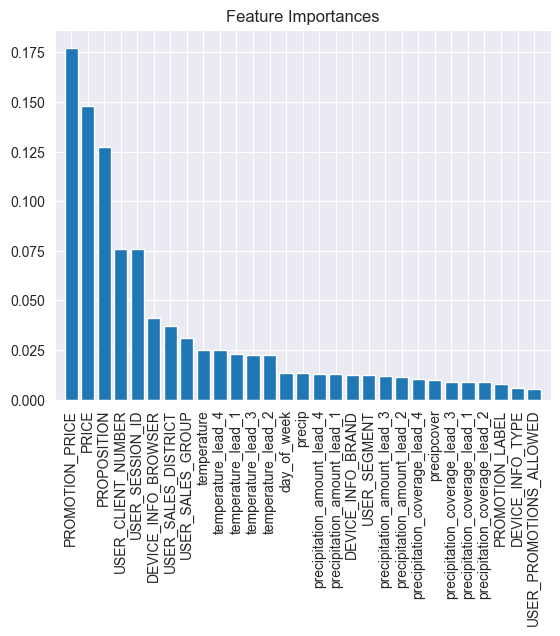

In [44]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Save the model

In [53]:
import pickle
import os
# save the model
file_path = "models/reward_predictor_model_weather.pkl"
for i in range(10):
    file_path = f"models/reward_predictor_model_weather_{i}.pkl"
    print(os.path.exists(file_path))



    if not os.path.exists(file_path):
        print(file_path)
        file_path = "models/reward_predictor_model_weather_" + str(i) + ".pkl"
        with open(file_path, 'wb') as file:
            pickle.dump(rf_regressor, file)
            break
    


False
models/reward_predictor_model_weather_0.pkl
